# Phase 3

From the previous phase, we decoded the following

```
What if the merovingian is wrong. What instead of causality something else could be ours? Therefor, if so, the ...... is ours. The thinker's 1name behind all of that would grant you access to the next step (of humanity). Definitely look into his works might you have time. /(aa,connected enf)

I just passed a cheshire cat and I'm getting fed up with this puzzle.. It's taking forever. But, How long is forever? I don't know, but just add giveit in front of the answer and you can fall in the keyhole. /(aa,connected enf)

3.The fundamental limit to the precision with which certain pairs of physical properties are know. /(aa,connected enf)

Phase 3.2 is ciphered with aes-256-cbc base64 and a sha256 pw, yet again.
```

Along with [an aes encrypted blob](./phase3-assets/phase3.2-aes.txt)

## Observations

* We see the ellipises to replace signal to us to replace it with a value
* We see the `/(aa connected enf)` style comments again
* There is again a digit-word (`1name`)

## Solving

### 3.1.1

If we read the first few sentences, we already know the answer to. If the Merovingian is wrong, then the opposite is choice. We can conclude that the sentence should read "therefor, if so, the choice is ours". And we're looking for "the thinker" that said that with a general mean of "access to the next step of humanity".

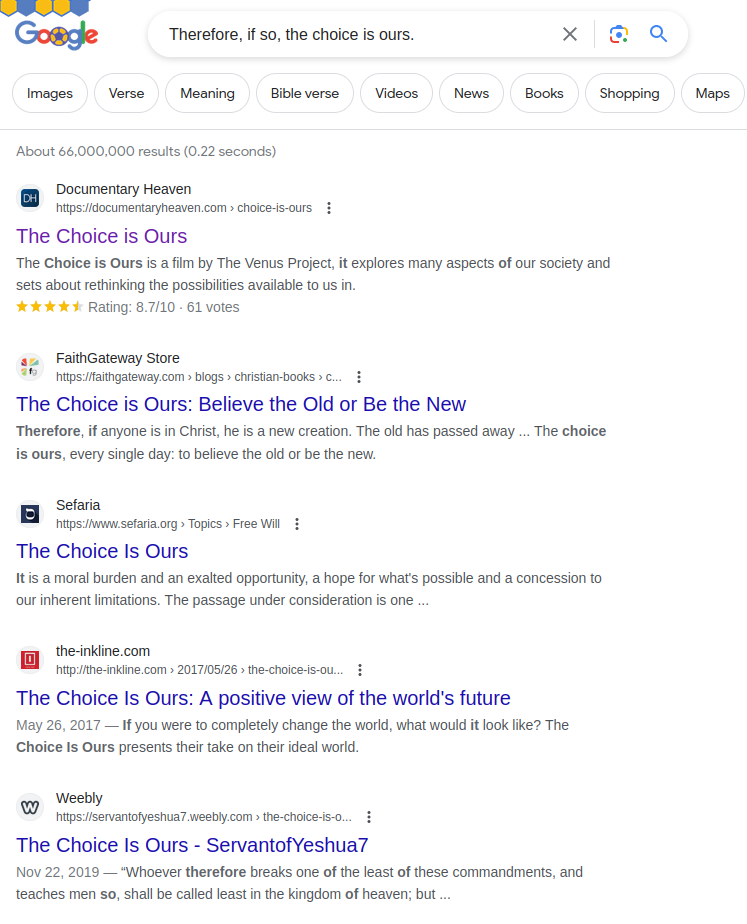

Looking at the search results we see a few entries about a film called "The Choice is Ours" that explores rethinking society for positive change - which is a similar premise that bitcoin was created under - we can have a deeper look into the movie.

> The Choice is Ours is a film by The Venus Project, it explores many aspects of our society and sets about rethinking the possibilities available to us in our world, dispelling the myth of so called “Human Nature”, insisting that it is our environment which shapes our behaviour and shows us what type of world we could live in given the motivation to improve.

Let's have a look at The Venus Project on Wikipedia:

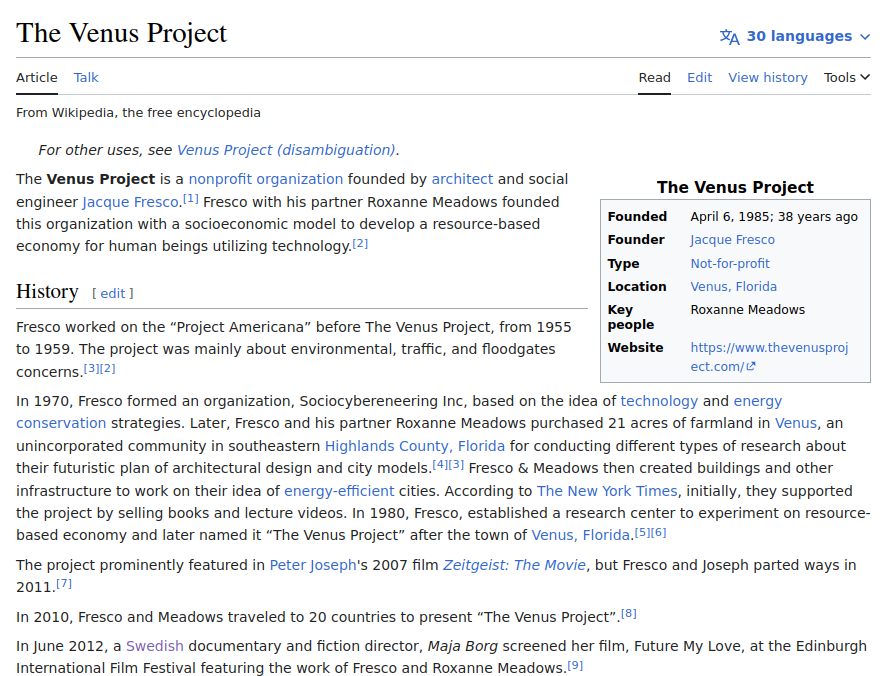


So, Jacque Fresco could be our "thinker". We'll try it later


## 3.1.2

Immediately "cheshire cat" seems to be a reference to Alice in Wonderland, which again has similar themes to The Matrix. We can try googling some of the sentences for context, and see if we can find the answer to "how long is forever"

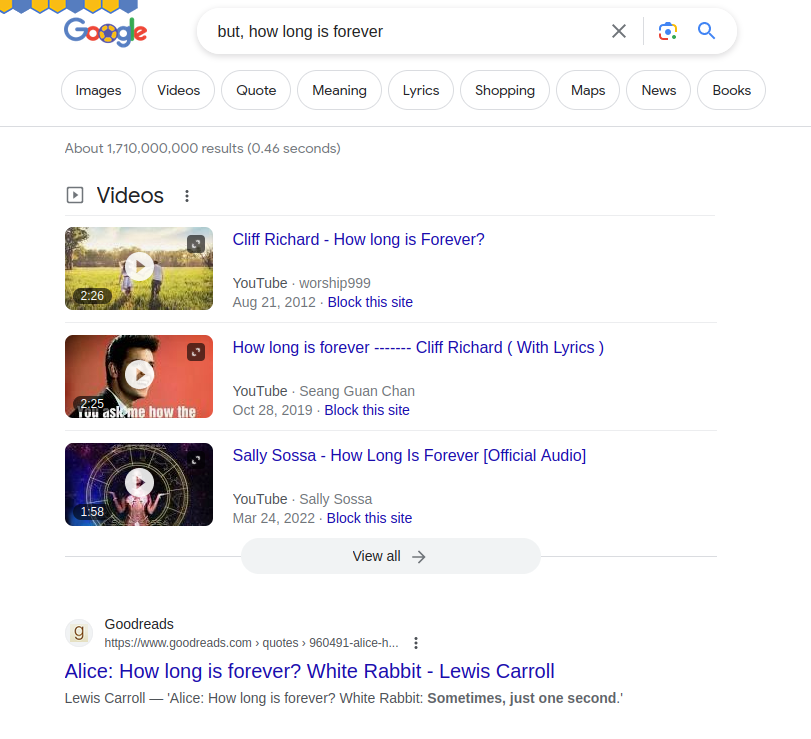

And we see the answer from the first result "Sometimes, just one second". However, I don't think we're done yet, the rest of the hint says to add "giveit" in front: "giveit Sometimes, just one second" 

But, that doesn't seem to make sense quite yet (and we know that it has to be lower case and no spaces/punctuation), let's remove "sometimes," so that the sentence makes sense: "giveitjustonesecond"



## Part 3.1.3

This part looks like we can google the phrase and figure out where it's from.

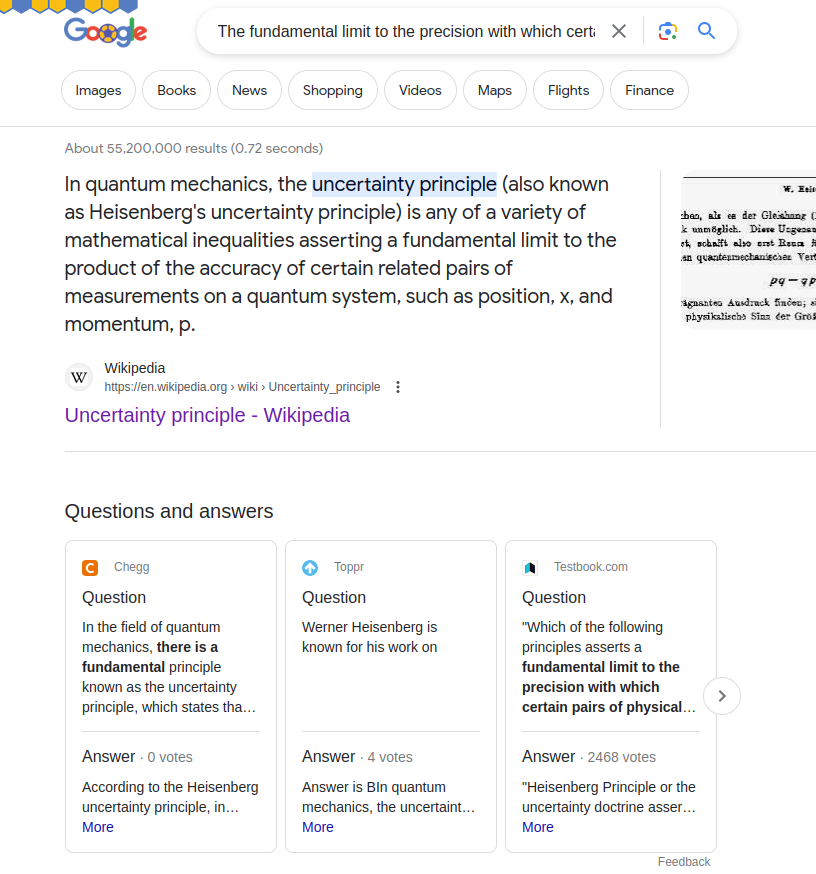


It looks like it's referring to "Heisenberg's uncertainty principle". Our key will be some variation on that name:
- Heisenberg's uncertainty principle
- uncertainty principle
- Heisenberg uncertainty principle



# Solving

Let's solve it the same way have previous section, taking into account what we know about casing

In [12]:
import re
import hashlib
import subprocess

phase3_aes_file = "./phase3-assets/phase3.2-aes.txt"


# our sha256()
def do_sha_hash(s):
    if isinstance(s, str):
        s = s.encode()
    m = hashlib.sha256()
    m.update(s)
    return m.hexdigest()

def decrypt_file(password):
    password_hash = do_sha_hash(password)

    try:
        # using subprocess because it's difficult to
        # do decryption directly in python
        with open("./phase3-assets/phase3.2.txt", "w+") as fp:
            p = subprocess.run(
                [
                    "openssl",
                    "aes-256-cbc", # Our algorithm
                    "-in",
                    phase3_aes_file,
                    "-a", # the file is in "amoured" format base64
                    "-d", # decrypt it
                    "-pass",
                    f"pass:{password_hash}"
                ],
                check=True, # we expect it to run correctly
                stdout = fp,
                stderr = subprocess.DEVNULL,
            )
            p.check_returncode()
            print(f"decrypted with {password} ({password_hash})")
            return True
    except (subprocess.CalledProcessError, ):
        # if either the command didn't return 0, or it gave us unicode garbage
        # we don't care
        pass
    return False


an_rx = re.compile(r'[^0-9a-zA-Z]+')
def lower_connected(s):
    return an_rx.sub("", s).strip().replace(' ','').lower()


p1 = lower_connected("Jacque Fresco")
p2 = lower_connected("give it just one second")

part3 = [
    "uncertainty principle",
    "the uncertainty principle",
    "Heisenberg uncertainty principle",
    "Heisenberg's uncertainty principle",
    
]

for p3 in map(lower_connected, part3):
    password = f"{p1}{p2}{p3}"
    if decrypt_file(password):
        break
else:
    print("Did not find password")

decrypted with jacquefrescogiveitjustonesecondheisenbergsuncertaintyprinciple (250f37726d6862939f723edc4f993fde9d33c6004aab4f2203d9ee489d61ce4c)


# Conclusion

Using the tools we learnt from prior phases, we were able to decode this step with relative ease.

[Link to next phase](./phase3.2.ipynb)